In [1]:
import pymysql
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
sql = 'select * from rent_info'
conn = pymysql.connect(host = '127.0.0.1', user = 'root', password = 'root', port = 3306, db = 'wuhan', charset = 'utf8')
df = pd.read_sql(sql, con=conn )

In [3]:

df['title'] = df['title'].str.strip()
df['room_type'] = df['room_type'].str.strip()
df['floor'] = df['floor'].str.strip()
df['position'] = df['position'].str.strip()
df['house_year'] = df['house_year'].fillna(method = 'ffill')

In [4]:
df[['square', 'price']]=df[['square', 'price']].astype(np.int64)

In [5]:
df['house_year'].replace("",np.nan,inplace = True)

In [6]:
df['house_year'].fillna(method = 'ffill',inplace = True)
df['house_year'].values.astype(np.int64)

array([1999, 2005, 2009, ..., 2013, 2005, 2005])

In [7]:
name = DataFrame(df['title'].value_counts())
name['avg_price'] = df.groupby('title')['price'].mean()
name = name[name['title']>100]
name.head(10)

,title,avg_price
东立国际,863,2703.302433
航天双城,378,3835.476190
长投景城汉口年华,369,2071.409214
澳门银座,294,2010.544218
融科天城一期,281,4720.640569
景兰苑,249,2111.244980
连城家园,221,2598.190045
融科天城三期,195,4561.025641
同鑫花园,194,2616.546392
汉口城市广场,194,2559.793814


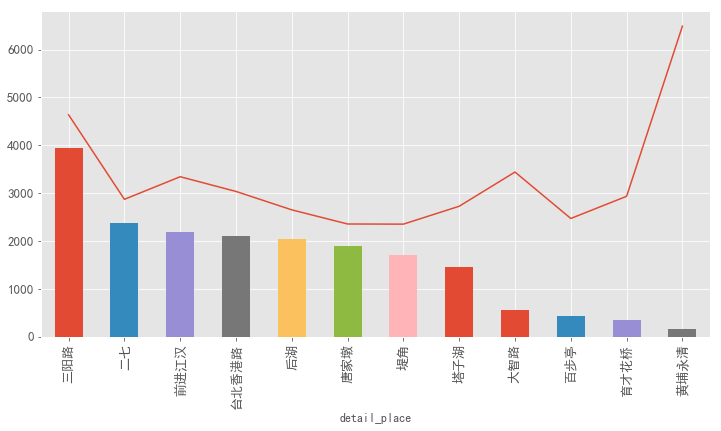

In [8]:
df['detail_place'].value_counts().plot(kind = 'bar',rot = 90,fontsize = 13,figsize = (12,6))
df[['detail_place', 'price']].groupby('detail_place')['price'].mean().plot(rot = 90,figsize = (12,6))

                    

Text(0,0.5,'数量')

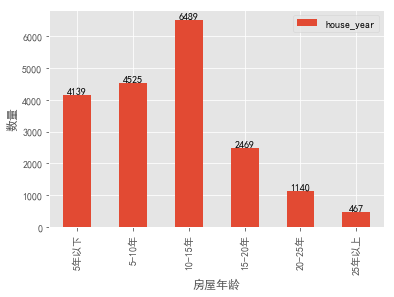

In [9]:
year = df['house_year'].value_counts().reset_index()
year['house_age'] = 2018-year['index'].astype(np.int64)
year.sort_values(by = 'house_age')
bins = [0,5,10,15,20,25,35]
level = ["5年以下", '5-10年', '10-15年', '15-20年', '20-25年', '25年以上']
stage = pd.cut(year['house_age'], bins = bins, labels = level)
year['level'] =stage
age_info = year[['level','house_year']].groupby('level').sum()
age_info
age_info.plot.bar()
for a,b in zip(np.arange(len(age_info.index)), age_info['house_year']):
    plt.text(a,b+0.05,'%.0f' %b, ha = 'center', va = 'bottom')
plt.xlabel("房屋年龄")
plt.ylabel("数量")

In [10]:
df['house_age'] = [2018 - int(i) for i in df['house_year']]
df['house_age']
df

,area,title,detail_place,room_type,square,position,floor,total_floor,house_year,price,tags,house_age
0,江岸,安居苑A区,百步亭,3室2厅,123,南北,中楼层,7,1999,2400,,19
1,江岸,温馨苑AB区,百步亭,3室2厅,138,南北,高楼层,7,2005,2500,,13
2,江岸,航天双城,二七,3室2厅,128,南,低楼层,27,2009,4500,距离1号线头道街站748米,9
3,江岸,汉口花园幽兰居,塔子湖,2室2厅,90,南北,高楼层,11,2011,1950,距离6号线石桥站957米,7
4,江岸,百合苑,百步亭,2室1厅,92,南,高楼层,6,2004,2400,,14
5,江岸,百步亭花园世博园,百步亭,3室2厅,90,南,高楼层,9,2011,2400,,7
6,江岸,新华路322到328号,台北香港路,2室1厅,75,南北,中楼层,8,2007,2600,,11
7,江岸,东立国际,二七,1室1厅,41,东北,中楼层,18,2008,2000,距离3号线罗家庄站763米,10
8,江岸,悦秀苑,百步亭,2室1厅,80,南,高楼层,18,2009,2300,,9
9,江岸,统建同安家园,后湖,3室1厅,91,南,中楼层,18,2007,2700,距离3号线后湖大道站646米,11


In [11]:
areas = df['area']
info = DataFrame(areas.value_counts().sort_values(ascending = False))
info

,area
武昌,3000
洪山,3000
东湖高新,3000
江岸,3000
江汉,2910
硚口,1680
汉阳,1650
东西湖,960
青山,60


In [12]:
price = df.groupby('area')['price'].agg(np.mean)
price.index

Index(['东湖高新', '东西湖', '武昌', '汉阳', '江岸', '江汉', '洪山', '硚口', '青山'], dtype='object', name='area')

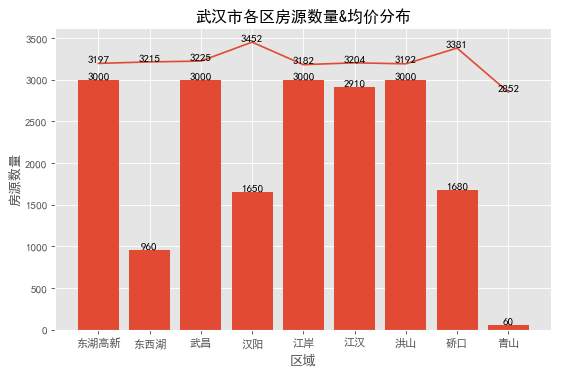

In [13]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 80)
ax.bar(info.index, info['area'])
ax.plot(price.index, price.values)
ax.set(title = '武汉市各区房源数量&均价分布',xlabel = '区域', ylabel = '房源数量')
for a, b in zip(info.index, info['area']):
    ax.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
for a, b in zip(price.index, price.values):
    ax.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

In [25]:
price_info = df[['area', 'price']]
bins = [0,1000,1500,2000,2500,3000,4000,5000,6000,8000,10000]
level = ['0-1000','1000-2000', '2000-2500', '2500-3000', '3000-4000', '4000-5000', '5000-6000', '6000-8000', '8000-1000','10000以上']
price_stage = pd.cut(price_info['price'], bins = bins,labels = level).value_counts().sort_index()
price_stage

0-1000        152
1000-2000     917
2000-2500    3704
2500-3000    4466
3000-4000    4053
4000-5000    3006
5000-6000    1455
6000-8000     459
8000-1000     466
10000以上       220
Name: price, dtype: int64

Text(0,0.5,'数量')

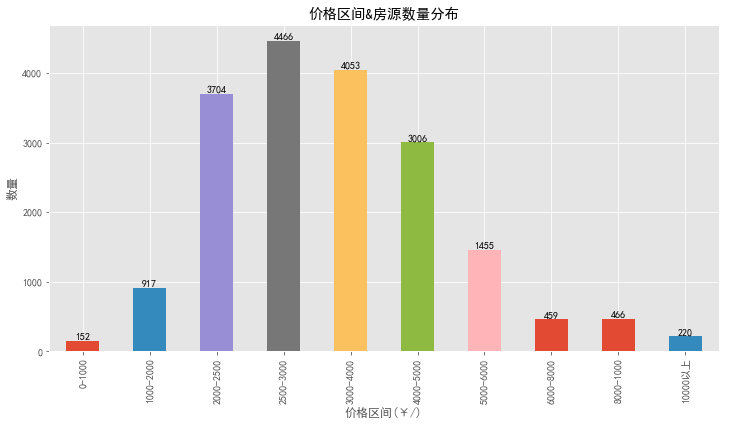

In [46]:
price_stage.plot(kind = 'bar',figsize = (12,6))
for a,b in zip(np.arange(len(price_stage.index)), price_stage.values):
    plt.text(a,b+0.5,'%.0f' %b,ha = 'center', va = 'bottom') 
plt.title("价格区间&房源数量分布")
plt.xlabel("价格区间(￥/)")
plt.ylabel("数量")

Text(0,0.5,'数量(/套)')

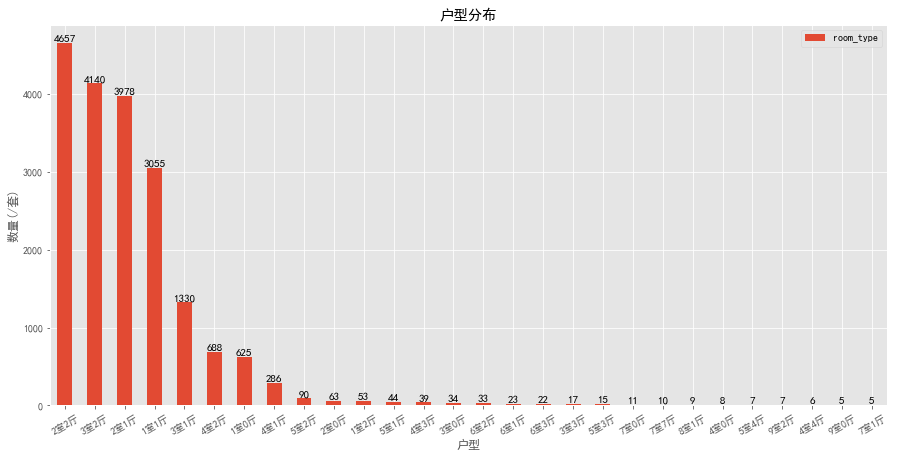

In [28]:
#户型分布
data = df['room_type'].value_counts().sort_values(ascending = False).reset_index()
data['price'] = df.groupby('room_type')['price'].mean().values
data[['index','room_type']].plot.bar(figsize = (15,7),x = data['index'],rot = 30)
for a,b in zip(data.index,data['room_type']):
    plt.text(a,b+0.05, '%.0f' % b ,ha = 'center', va = 'bottom',fontsize = 11)
plt.title('户型分布')
plt.xlabel('户型')
plt.ylabel('数量(/套)')

Text(0,0.5,'数量(/套)')

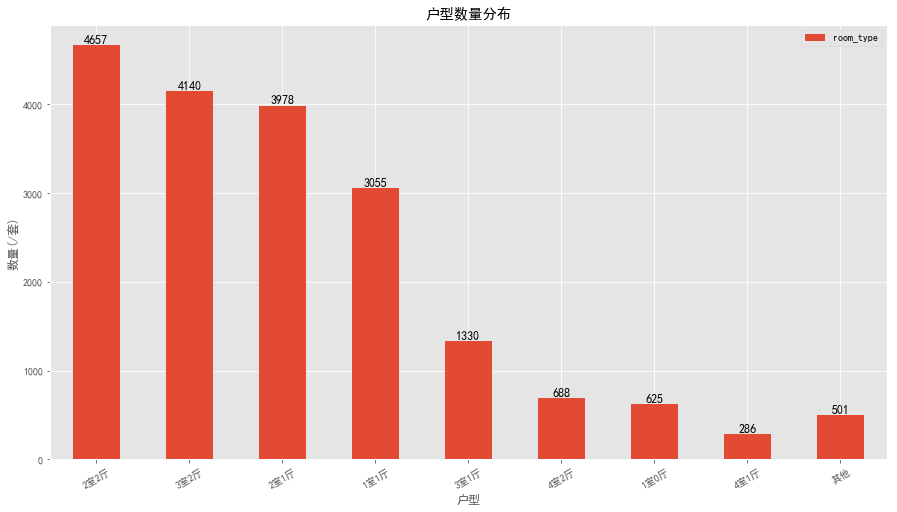

In [29]:
#将100套以下的同归为一类
data = df['room_type'].value_counts().sort_values(ascending = False).reset_index()
data = data.drop([i for i in range (8,28)],axis = 0).sort_values('room_type',ascending = False)
data.loc[8] = ['其他',501]
data.plot.bar(x = data['index'],figsize = (15,8),rot = 30)
for a,b in zip(data.index, data['room_type']):
    plt.text(a, b+0.7, '%.0f'% b,ha = 'center', va = 'bottom',fontsize = 12)
plt.title('户型数量分布')
plt.xlabel('户型')
plt.ylabel('数量(/套)')

In [30]:
bins =[0,30,60,90,120,150,200,300,400,700]
level = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-200', '200-300','300-400','400+']
df['square_level'] = pd.cut(df['square'],bins = bins,labels = level)
df_digit= df[['area', 'room_type', 'square', 'position', 'total_floor', 'floor', 'house_year', 'price', 'square_level']]
df_digit.head()

,area,room_type,square,position,total_floor,floor,house_year,price,square_level
0,江岸,3室2厅,123,南北,7,中楼层,1999,2400,120-150
1,江岸,3室2厅,138,南北,7,高楼层,2005,2500,120-150
2,江岸,3室2厅,128,南,27,低楼层,2009,4500,120-150
3,江岸,2室2厅,90,南北,11,高楼层,2011,1950,60-90
4,江岸,2室1厅,92,南,6,高楼层,2004,2400,90-120


In [31]:
square = df_digit[['square_level','price']]
prices = square.groupby('square_level').mean().sort_values('price',ascending = False).reset_index()
amount = square.groupby('square_level').count().reset_index()
prices

,square_level,price
0,400+,33625.769231
1,300-400,22500.000000
2,200-300,11089.835165
3,150-200,6209.886364
4,120-150,4278.518674
5,90-120,3207.799959
6,60-90,2595.875464
7,30-60,2180.490884
8,0-30,1165.442708


Text(0,0.5,'价格(￥/月)')

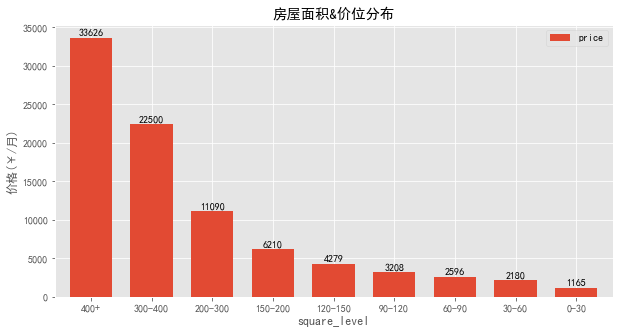

In [32]:
x = prices['square_level']
y = prices['price']
prices.plot(kind = 'bar',x = x,figsize=(10,5),rot=0,width = 0.7)

for a,b in zip(prices.index, y):
    plt.text(a, b+100, '%.0f' % b,ha='center', va= 'bottom',fontsize=10)
plt.title('房屋面积&价位分布')
plt.ylabel('价格(￥/月)')

Text(0,0.5,'房源数量')

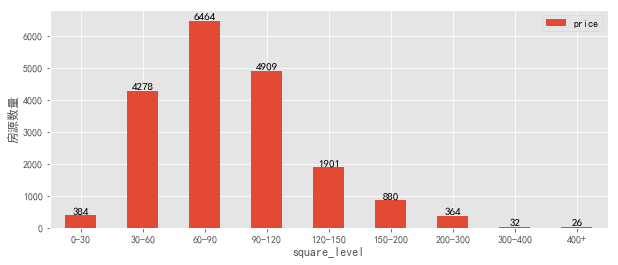

In [33]:
amount.plot(kind = 'bar',x = amount['square_level'], rot = 0,figsize=(10,4))
for a,b in zip(amount.index, amount['price']):
    plt.text(a,b+0.05, '%.0f' %b,ha='center', va= 'bottom',fontsize=11)
plt.ylabel('房源数量')

In [34]:
#楼层分布
df_digit.head()

,area,room_type,square,position,total_floor,floor,house_year,price,square_level
0,江岸,3室2厅,123,南北,7,中楼层,1999,2400,120-150
1,江岸,3室2厅,138,南北,7,高楼层,2005,2500,120-150
2,江岸,3室2厅,128,南,27,低楼层,2009,4500,120-150
3,江岸,2室2厅,90,南北,11,高楼层,2011,1950,60-90
4,江岸,2室1厅,92,南,6,高楼层,2004,2400,90-120


floor
中楼层    7844
高楼层    6572
低楼层    4827
地下室      17
Name: floor, dtype: int64

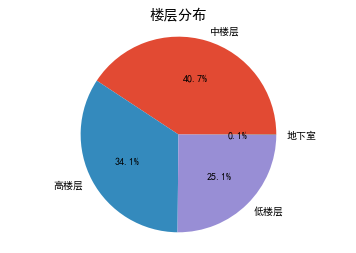

In [35]:
f = df_digit.groupby('floor')['floor'].count().sort_values(ascending = False)
f.plot.pie( labels = f.index,autopct = '%1.1f%%')
plt.title('楼层分布')
plt.ylabel("")
plt.axis("equal")
f

In [36]:
df_digit.head()

,area,room_type,square,position,total_floor,floor,house_year,price,square_level
0,江岸,3室2厅,123,南北,7,中楼层,1999,2400,120-150
1,江岸,3室2厅,138,南北,7,高楼层,2005,2500,120-150
2,江岸,3室2厅,128,南,27,低楼层,2009,4500,120-150
3,江岸,2室2厅,90,南北,11,高楼层,2011,1950,60-90
4,江岸,2室1厅,92,南,6,高楼层,2004,2400,90-120


In [37]:
limit_30 = df_digit[df['square_level']=='0-30']
limit_30.head()

,area,room_type,square,position,total_floor,floor,house_year,price,square_level
190,江岸,1室0厅,26,西,8,中楼层,1998,1100,0-30
486,江岸,1室0厅,20,北,7,低楼层,1998,1000,0-30
758,江岸,1室1厅,24,南,24,中楼层,2007,1750,0-30
801,江岸,1室0厅,30,南,5,高楼层,2005,1100,0-30
913,江岸,1室0厅,30,南北,9,高楼层,2007,1200,0-30


Text(0.5,0,'区域')

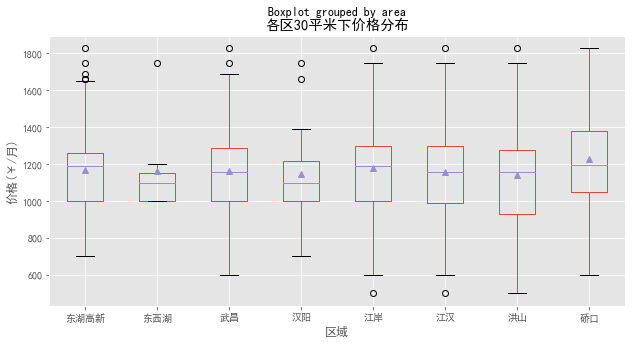

In [38]:
limit_30[[ 'price','area']].boxplot(column = 'price', by = 'area',showmeans = True,figsize = (10,5))
plt.title('各区30平米下价格分布')
plt.ylabel('价格(￥/月)')
plt.xlabel('区域')

In [39]:
df_clean = df[['square','price','house_age']]

In [40]:
from sklearn.cluster import KMeans
#使用房源总价，面积和关注度三个字段进行聚类
house_type = np.array(df[['square','price','house_age']])
#设置n_clusters=3
clf=KMeans(n_clusters=5)
#计算聚类结果
clf=clf.fit(house_type)

In [41]:
clf.cluster_centers_


array([[  7.61240032e+01,   2.30147345e+03,   1.13298369e+01],
       [  1.63051701e+02,   9.27306667e+03,   1.06925170e+01],
       [  1.15091053e+02,   4.26717377e+03,   1.03862970e+01],
       [  2.95083333e+02,   1.89453333e+04,   1.07333333e+01],
       [  5.55306122e+02,   4.67067347e+04,   1.04285714e+01]])

In [42]:
df_clean['label']= clf.labels_

/home/lwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_clean.groupby('label').count()

,square,price,house_age
label,,,
0,13919,13919,13919
1,735,735,735
2,4437,4437,4437
3,120,120,120
4,49,49,49
